# CIVL 315 - Lab 2
Miguel Pampolina
Oct 31st, 2021

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import polyfit
mpl.style.use("seaborn")

In [2]:
ft_to_m = 0.3048        # feet to meters
ft3_to_m3 = 0.0283168   # feet-cubed to meter-cubed
lbf_to_n = 4.44822      # pound-force to newtons
lbs_to_kg = 0.453592    # pounds to kilograms
in_to_m = 0.0254        # inches to meters
gravity_const = 9.8     # m/s^2
gamma_water = 9800      # unit weight of water

In [3]:
imp_df_jet = pd.read_csv("./labB/lab2_jet.csv")
imp_df_turbine = pd.read_csv("./labB/lab2_turbine.csv")

## Analysis of Jet Impact Data

**Jet**
* turn: number of turn of the needle valve
* time: time in sec for 2 cubic feet to fill
* pressure head: pressure head read by the manometer in feet of water
* velocity head: velocity head measured by the pitot tube in feet of water
* Force plate: Force on plate measured by the load cell in pound-force (lbf)

In [4]:
imp_df_jet

,turn,time,pressure_head,velocity_head,Force_plate
0,1,40.95,73.01,70.87,5.75
1,2,22.09,64.61,62.33,9.38
2,3,16.78,57.47,56.53,11.98
3,4,13.94,52.50,50.79,13.41
4,5,12.70,46.52,48.02,14.03


In [5]:
jet_si = pd.DataFrame()
jet_si[["turn", "time"]] = imp_df_jet[["turn", "time"]].copy()
jet_si["pressure_head"] = imp_df_jet["pressure_head"].apply(lambda x: x * ft_to_m).copy()
jet_si["velocity_head"] = imp_df_jet["velocity_head"].apply(lambda x: x * ft_to_m).copy()
jet_si["force_plate_actual"] = imp_df_jet["Force_plate"].apply(lambda x: x * lbf_to_n)

In [6]:
jet_si["Q"] = jet_si["time"].apply(lambda x: (2 * ft3_to_m3) / x)

In [7]:
jet_si["v"] = jet_si["velocity_head"].apply(lambda x: math.sqrt(x*2*gravity_const))

In [8]:
jet_si

,turn,time,pressure_head,velocity_head,force_plate_actual,Q,v
0,1,40.95,22.253448,21.601176,25.577265,0.001383,20.576274
1,2,22.09,19.693128,18.998184,41.724304,0.002564,19.296746
2,3,16.78,17.516856,17.230344,53.289676,0.003375,18.377017
3,4,13.94,16.002000,15.480792,59.650630,0.004063,17.419056
4,5,12.70,14.179296,14.636496,62.408527,0.004459,16.937394


Theoretical force exerted on a flat plate

In [9]:
def forceExertedPlate(Q, v, theta, rho=1000):
    return rho*Q*v*(1-math.cos(theta))

In [10]:
def getInputPower(gamma, Q, H):
    return gamma*Q*H

In [11]:
jet_si["force_plate_theoretical"] = jet_si.apply(lambda rows: forceExertedPlate(rows["Q"], rows["v"], math.pi/2), axis=1)

In [12]:
jet_si["input_power"] = jet_si.apply(lambda rows: getInputPower(gamma_water, rows["Q"], rows["pressure_head"]), axis=1)
jet_si["nozzle_head_loss"] = jet_si.apply(lambda rows: rows["pressure_head"] - rows["velocity_head"], axis=1)

In [13]:
jet_si

,turn,time,pressure_head,velocity_head,force_plate_actual,Q,v,force_plate_theoretical,input_power,nozzle_head_loss
0,1,40.95,22.253448,21.601176,25.577265,0.001383,20.576274,28.456861,301.608551,0.652272
1,2,22.09,19.693128,18.998184,41.724304,0.002564,19.296746,49.472349,494.788085,0.694944
2,3,16.78,17.516856,17.230344,53.289676,0.003375,18.377017,62.023636,579.381266,0.286512
3,4,13.94,16.002000,15.480792,59.650630,0.004063,17.419056,70.767853,637.106062,0.521208
4,5,12.70,14.179296,14.636496,62.408527,0.004459,16.937394,75.529575,619.656761,-0.457200


In [14]:
jet_si[["turn", "time", "pressure_head", "velocity_head", "Q", "v", "force_plate_actual", "force_plate_theoretical", "input_power", "nozzle_head_loss"]]

,turn,time,pressure_head,velocity_head,Q,v,force_plate_actual,force_plate_theoretical,input_power,nozzle_head_loss
0,1,40.95,22.253448,21.601176,0.001383,20.576274,25.577265,28.456861,301.608551,0.652272
1,2,22.09,19.693128,18.998184,0.002564,19.296746,41.724304,49.472349,494.788085,0.694944
2,3,16.78,17.516856,17.230344,0.003375,18.377017,53.289676,62.023636,579.381266,0.286512
3,4,13.94,16.002000,15.480792,0.004063,17.419056,59.650630,70.767853,637.106062,0.521208
4,5,12.70,14.179296,14.636496,0.004459,16.937394,62.408527,75.529575,619.656761,-0.457200


In [15]:
# jet_si[["turn", "time", "pressure_head", "velocity_head", "Q", "v", "force_plate_actual", "force_plate_theoretical", "input_power", "nozzle_head_loss"]].to_excel("jet.xlsx")

last point is random error, pressure head should be higher than velocity head

deflected angle is < 90 degress which would lower theoretical force

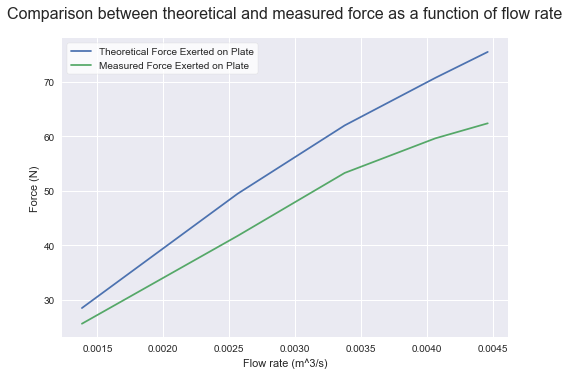

In [16]:
plt.plot(jet_si["Q"], jet_si["force_plate_theoretical"], label="Theoretical Force Exerted on Plate")
plt.plot(jet_si["Q"], jet_si["force_plate_actual"], label="Measured Force Exerted on Plate")
plt.title("Comparison between theoretical and measured force as a function of flow rate", fontsize=16, pad=20)
plt.xlabel("Flow rate (m^3/s)")
plt.ylabel("Force (N)")
plt.legend(frameon=True, facecolor="white")

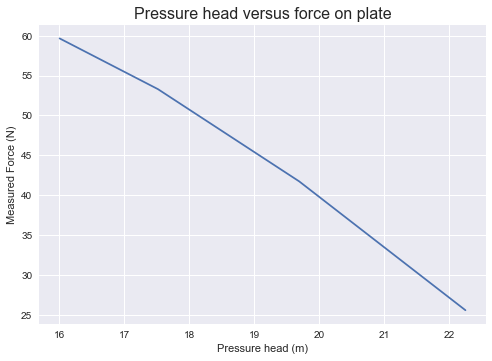

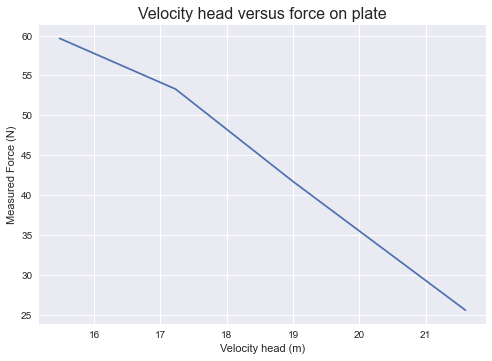

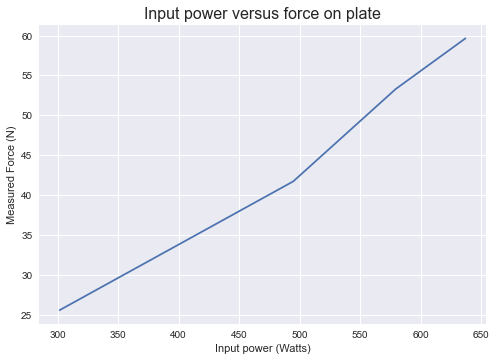

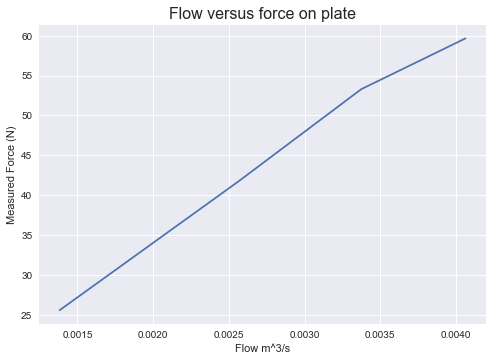

In [17]:
categories = [("pressure_head", "Pressure head", "(m)"), ("velocity_head", "Velocity head", "(m)"), ("input_power", "Input power", "(Watts)"), ("Q", "Flow", "m^3/s")]
for key, category, unit in categories:
    plt.plot(jet_si[key][:-1], jet_si["force_plate_actual"][:-1])
    plt.title(f"{category} versus force on plate", fontsize=16)
    plt.xlabel(f"{category} {unit}")
    plt.ylabel("Measured Force (N)")
    plt.show()

## Analysis of Pelton Turbine

**Tubine**
* rpm: Pelton wheel rotation speed in rotation per minute
* T1: cell load reading in lbs
* T2: weight attached in kg
* Pelton wheel radius: 5.8 inches
* Fly wheel diameter: 6 inches

In [18]:
turbine_si = pd.DataFrame()
turbine_si[["rpm", "T2"]] = imp_df_turbine[["rpm", "T2"]].copy()
turbine_si["cell_load"] = imp_df_turbine["T1"].apply(lambda x: x * lbs_to_kg)
turbine_si.rename(columns={"T2": "weight_attached"}, inplace=True)
turbine_si = turbine_si[["rpm", "cell_load", "weight_attached"]]

In [19]:
imp_df_turbine

,rpm,T1,T2
0,0,33.64,4.22
1,119,32.39,2.22
2,130,28.65,2.63
3,168,28.33,1.95
4,360,22.71,1.17
5,535,20.70,0.96
6,572,18.57,1.34
7,821,10.23,1.38
8,838,11.16,1.02
9,982,5.88,0.41


In [20]:
pelton_Q = jet_si.iloc[1]["Q"]
pelton_v = jet_si.iloc[1]["v"]
pelton_theta = 170
pelton_radius = 5.8 * in_to_m
flywheel_radius = 6/2 * in_to_m

In [21]:
def forcePelton(Q, v, u, theta, rho=1000):
    return rho*Q*(v-u)*(1-math.cos(theta))

In [22]:
def waterPowerPelton(Q, v, u, theta):
    return forcePelton(Q, v, u, theta)*u

In [23]:
def powerDrum(N, T_1, T_2, r, g=9.8):
    return 2*math.pi*r*g*N*(T_1 - T_2)

In [24]:
turbine_si["water_power"] = turbine_si["rpm"].apply(lambda x: waterPowerPelton(pelton_Q, pelton_v, x*2*math.pi*pelton_radius*(1/60), pelton_theta*(math.pi/180))).copy()

In [25]:
turbine_si["shaft_power"] = turbine_si.apply(lambda row: powerDrum(row["rpm"]*1/60, row["cell_load"], row["weight_attached"], flywheel_radius), axis=1).copy()

In [26]:
turbine_si["theoretical_efficiency_water"] = round((turbine_si["shaft_power"] / turbine_si["water_power"] * 100), 2)
turbine_si.at[0, "theoretical_efficiency_water"] = 0

In [27]:
theoretical_input_power = getInputPower(gamma_water, pelton_Q, jet_si.iloc[1]["pressure_head"])
turbine_si["theoretical_efficiency_input"] = round((turbine_si["shaft_power"] / theoretical_input_power * 100), 2)

* rpm: unitless
* Cell Load: kg
* Weight Attached: kg
* Water Power: watt
* Shaft Power: watt
* Theoretical Efficiency Wheel: %
* Theorretical Efficiency: %

In [28]:
turbine_si["theoretical_efficiency_water_over_input"] = round((turbine_si["water_power"] / theoretical_input_power * 100), 2)

In [29]:
turbine_si

,rpm,cell_load,weight_attached,water_power,shaft_power,theoretical_efficiency_water,theoretical_efficiency_input,theoretical_efficiency_water_over_input
0,0,15.258835,4.22,0.000000,0.000000,0.00,0.00,0.00
1,119,14.691845,2.22,163.117556,116.061272,71.15,23.46,32.97
2,130,12.995411,2.63,176.463786,105.375473,59.72,21.30,35.66
3,168,12.850261,1.95,220.313890,143.204234,65.00,28.94,44.53
4,360,10.301074,1.17,388.390432,257.059728,66.19,51.95,78.50
5,535,9.389354,0.96,463.802737,352.661265,76.04,71.28,93.74
6,572,8.423203,1.34,470.247239,316.836648,67.38,64.03,95.04
7,821,4.640246,1.38,427.370200,209.316379,48.98,42.30,86.37
8,838,5.062087,1.02,418.966289,264.886186,63.22,53.54,84.68
9,982,2.667121,0.41,319.702232,173.330898,54.22,35.03,64.61


In [30]:
# turbine_si.to_excel("turbine.xlsx")

Text(0, 0.5, 'Shaft Power (Watts)')

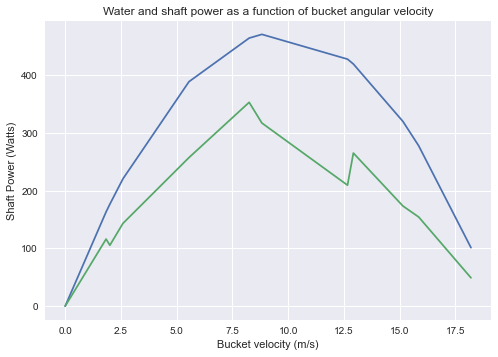

In [31]:
plt.plot(turbine_si["rpm"]*(1/60)*2*math.pi*pelton_radius, turbine_si["water_power"])
plt.plot(turbine_si["rpm"]*(1/60)*2*math.pi*pelton_radius, turbine_si["shaft_power"])
plt.title("Water and shaft power as a function of bucket angular velocity")
plt.xlabel("Bucket velocity (m/s)")
plt.ylabel("Shaft Power (Watts)")

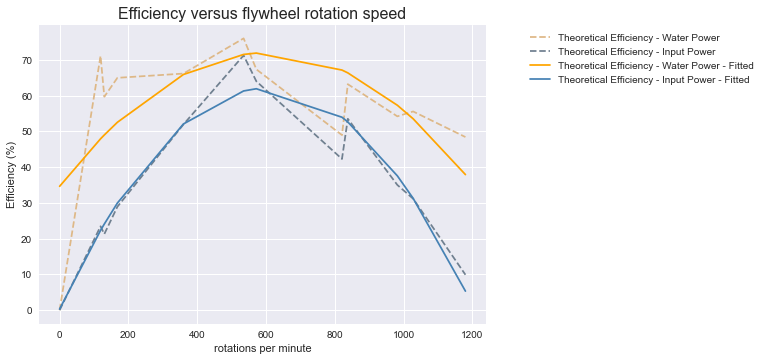

In [32]:
plt.plot(turbine_si["rpm"], turbine_si["theoretical_efficiency_water"], label="Theoretical Efficiency - Water Power", color="burlywood", linestyle="--")
plt.plot(turbine_si["rpm"], turbine_si["theoretical_efficiency_input"], label="Theoretical Efficiency - Input Power", color="slategrey", linestyle="--")
plt.ylabel("Efficiency (%)")
plt.xlabel("rotations per minute")
coef1 = polyfit(turbine_si["rpm"], turbine_si["theoretical_efficiency_water"], 2)
p1 = coef1[0] * np.square(turbine_si["rpm"]) + coef1[1] * turbine_si["rpm"] + coef1[2]
coef2 = polyfit(turbine_si["rpm"], turbine_si["theoretical_efficiency_input"], 2)
p2 = coef2[0] * np.square(turbine_si["rpm"]) + coef2[1] * turbine_si["rpm"] + coef2[2]
plt.plot(turbine_si["rpm"], p1, label="Theoretical Efficiency - Water Power - Fitted", color="orange")
plt.plot(turbine_si["rpm"], p2, label="Theoretical Efficiency - Input Power - Fitted", color="steelblue")
plt.legend(loc='upper center', bbox_to_anchor=(1.35, 1))
plt.title("Efficiency versus flywheel rotation speed", fontsize=16)
plt.show()

Theoretical force exerted at the edge of the pelton wheel

Theoretical power generated by the pelton wheel. This value will be less than the theoretical power estimated by getPower() and will be compared with the measured power.
* Maximum power is generated when theta = 180 degrees
* In practice theta is assumed to be 170 degrees to avoid interference with the jet.

T_1 and T_2 are the spring scale readings, N = rps, 2\*pi\*r\*N = w (angular velocity of wheel)